In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x = np.array([0,3,6,9,12,15,18,21,24])
y = np.array([10,13,16,19,22,25,28,31,34])

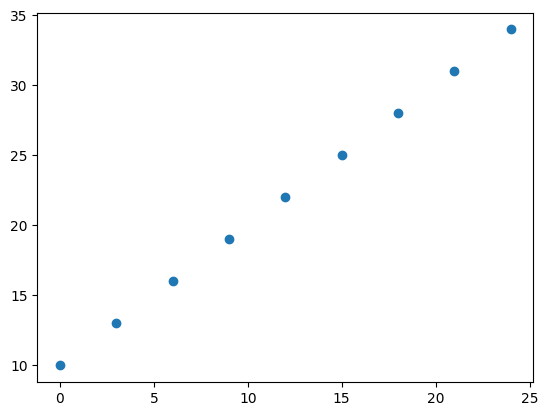

In [3]:
plt.scatter(x,y)

## Simple Model(Small Model)

In [4]:
#Random seed
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. Compile the modle
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
#3. Fit the model
model.fit(tf.expand_dims(x, axis=-1),y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 23.7135 - mae: 23.7135
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 22.2635 - mae: 22.2635
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 20.8135 - mae: 20.8135
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 19.3635 - mae: 19.3635
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 17.9135 - mae: 17.9135


## Large Model

In [5]:
# Random Seed
tf.random.set_seed(42)

#1. Create The Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
#2. Comile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)
#3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 22.5867 - mae: 22.5867
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 17.2654 - mae: 17.2654
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 9.6133 - mae: 9.6133
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 8.7573 - mae: 8.7573
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 7.9949 - mae: 7.9949
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 4.2533 - mae: 4.2533
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 7.4494 - mae: 7.4494
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 7.8165 - mae: 7.8165
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 5.5811 - mae: 5.5811
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 4.6279 - mae: 4.6279
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 6.4958 - mae: 6.4958
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 6.4305 - mae: 6.4305
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 4

In [6]:
model.predict(np.array([25]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


array([[37.205456]], dtype=float32)

## Evaluating a model
In prctice a typical workflow you'll go through when building neurla networks is:

```
Build a mdoel -> fit it = evaluate it -> twik a moodel-> evaluate it
```


In [7]:
x = tf.range(-100,100,4)

## The 3 Sets
* **Training set** - The model learns from this data, which is typically 70-80% of the total data you have avalilable.
* **Validation set** -the model gets tuned in this data,which is typically 10-15% of the data available
* **Test set** - this model gets evaluated on  data to test what is had learned this set is typically 10-15% of the total data availabel.

In [8]:
y = x +10
y.shape

TensorShape([50])

In [9]:
x_train = x[:40]
y_train = y[:40]
y_test  = y[40:]
x_test = x[40:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [10]:
x[0]

<tf.Tensor: shape=(), dtype=int32, numpy=-100>

In [11]:
x_train = tf.reshape(x_train,[-1,1])

In [12]:
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [13]:
#2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)


In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Visualizing our modle's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this inthe form of `y_test` or `y_true` versus `y_pred` (ground truth your model's predictions).

In [24]:
# Make some predictions
model.fit(x_train, y_train, epochs=100,verbose=0)

In [16]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 **Note** if you feel like you're going to reuse some kind of functionality in the future ,it's a good idea to turn it into a function. 

In [17]:
# Let's create a plotting function
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = y_pred):
    plt.figure(figsize=(10,7))
    #plot training data in blue
    plt.scatter(train_data, train_labels, c="b",label = "Training data")
    plt.scatter (test_data, test_labels, c="g", label = "Tesiting data")
    plt.scatter(test_data, predictions, c="r", label="predictions")
    plt.legend();
    

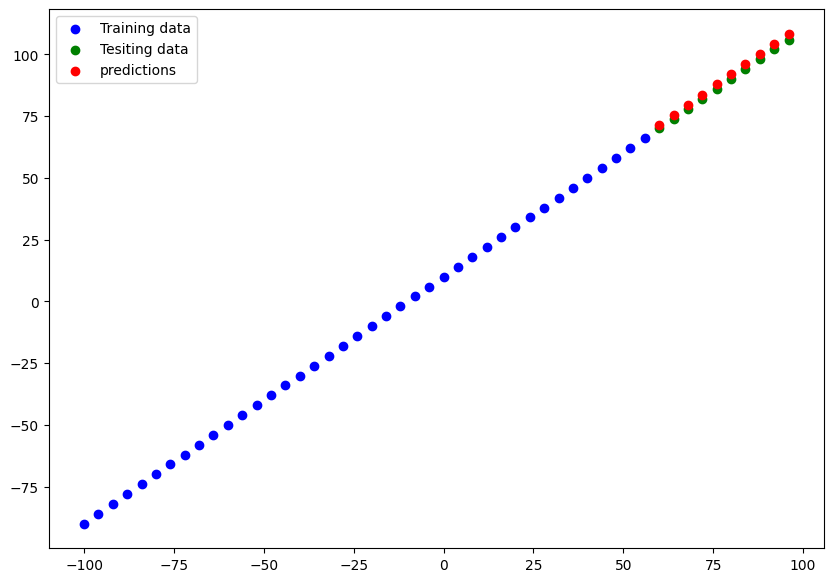

In [18]:
plot_predictions()

## Evaluating our models predictions with regression evaluation metrics
Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.
Since we're working on a regression, tow of the main metrics:
* Mae- mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE= mean square error, "square the average errors"

In [20]:
# Evaluate the model on the test
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 1.8662 - mae: 1.8662


[1.8661606311798096, 1.8661606311798096]

### Calcuate the mean absolute error

In [40]:
mae = tf.keras.metrics.MeanAbsoluteError()


In [41]:
mae.update_state(y_test, y_pred)
mae_result = mae.result().numpy()
mae_result

1.8661606

### Calculate the mean square error

In [42]:
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_pred, y_test)
mse_result = mse.result().numpy()
mse_result

2.2

## Make Some function to reuse MAE and MSE

In [50]:
def mae(y_true, y_pred):
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(y_test, y_pred)
    mae_result = mae.result().numpy()
    return f"Mean Absolute Error= {mae_result}"

def mse(y_true, y_pred):
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(y_true, y_pred)
    mse_result = mse.result().numpy()
    return f"Mean Squared Error = {mse_result}"

mae(y_test, y_pred),mse(y_test, y_pred)

('Mean Absolute Error= 1.8661606311798096',
 'Mean Squared Error = 3.568131923675537')

## Runing experiments to improve our model
```
Build a model -> fit it-> evaluate it -> tweak it
```
1. Get more data -get more examples fo your model to train on(more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complsex model) - this might come in the form of more layers or more hidden uints in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:
1. `model_1` - same as the orgigina model, 1layer trained for 100 epochs.
2. `model_2` - 2 layers, trainde for 100 epochs
3. `model_3` - 2 layers, traind for 500 epochs

### The machile learning practitioner's motto
***Experiment, experiment, experiment***

# Saving our models

Saving our models allows us tu use the outsid of google colab(or whereever they were trained) such as in a web application or a mobile app
**There are two main formats we can save our model's too**:
1. The SavedModel fromat
2. The HDF5 fromat

In [54]:
# save model using the savedformat format
model.export("saved_model_fromat")

INFO:tensorflow:Assets written to: saved_model_fromat\assets


INFO:tensorflow:Assets written to: saved_model_fromat\assets


Saved artifact at 'saved_model_fromat'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1950020830224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1950020831376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1950020831760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1950020832528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1950020831952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1950020833296: TensorSpec(shape=(), dtype=tf.resource, name=None)


## Load a Saved model

In [56]:
# save model using the HDF5 format
model.save("best_model_HDF5_format.h5")

In [60]:
# save model using the HDF5 format
model.save("best_model_keras_format.keras")

In [63]:
loaded_savedmodel = tf.keras.models.load_model("best_model_keras_format.keras")
loaded_savedmodel.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,804 (81.27 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,403 (40.64 KB)

In [64]:
modle_pred = model.predict(x_test)
loaded_pred = loaded_savedmodel.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


In [65]:
mae(y_test, modle_pred)==mae(y_test, loaded_pred)

True

### Load in amodel yisng the .hf format